# Introduction to Machine Learning with scikit-learn
### Rachel Rakov
Welcome!  In this workshop, we are going to learn how to go through the process of doing *machine learning* on a set of data.   To do so, we will download a *corpus* of text data to work with, extract *features* from this data, and do *supervised* machine learning to our data, using a mathmatical algorithm to train a*classifier* which will then classify previously unseen data into a set of predefined categories.


"Machine learning is a research field that sits at the intersections of statistics, artificial intelligence, and computer science.  It is also known as *predictive analystics* or *statistical learning*."

-- Andreas Mueller, "Introduction to Machine Learning with Python".

## Key terms
- *machine learning*: An application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed


- *corpus*: A large collection of data.  In our case, this will be text data (although a corpus can contain any type of data)


- *features*: Properties that describe data entities for machine learning


- *feature representation, feature vector*: A set of features


- *supervised machine learning*:  A machine learning task of learning a function that maps an input to an output based on example input-output pairs


- *unsupervised machine learning*: A machine learning task used to draw inferences from datasets consisting of input data without labeled responses (lacks input-output pairs; only has input data)


- *algorithm*: A process or set of rules to be followed in calculations (or other problem-solving operations), particularly by a computer


- *classification*: An machine learning task used to predict a class label, which is a choice from a predefined list of possibilities

Sources: Wikipedia, Andreas Mueller's "Introduction to Machine Learning with Python"


## Goals of this workshop
In this workshop, you will learn the following skills:
- How to use skills from the NLTK workshop to build features for a classification task
- How to build a text classification system that can predict whether sentences belong to one category ("news") or another ("romance")
- How to prepare data for machine learning using *pandas*, a package for Python that helps to organize your data
    - Looks similar to an Excel spreadsheet
- How to use the scikit-learn package for Python to perform machine learning on the data
- How to evaluate the results of the classifier, helping to decide whether the classifier is effective
- How to adjust paramaters of a classifier to improve accuracy

### What do you need for this workshop?
- Python 3
    - You can also download the Jupyter Notebook for this lesson to follow along
- The Natural Lanugage Toolkit
    - We will be using both corpora and tools from this package
- pandas 
    - We will use this for data processing
    - Comes with Anaconda
- matplotlib
    - We will use this for visualizing our data
    - Comes with Anaconda
- sckiit-learn
    - We will use this for machine learning
    - Comes with Anaconda 

### Let's get started by importing some packages we will need for this workshop!
- The Brown Corpus: A text corpus of American English, split into fifteen different categories
- Part of speech taggers (POS): prebuilt functions that are designed to determine the part of speech of every word in the sentence you give them
- Pandas as pd: importing the Pandas toolkit and renaming it pd, so we don't have to type too much
- matplotlib.pyplot as plt: importing plotting tools from matplotlib and renaming them plt
    - ~~~
    %matplotlib inline
    ~~~
    We use the above code to ensure our images display clearly in the Jupyter notebook.

- sklearn: the scikit-learn machine learning toolkit



In [63]:
import nltk
from nltk.corpus import brown
from nltk import pos_tag_sents
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn


## What is classification?  Let's show an example using fruit!

### How would you describe apples to a computer?  How would they differ from oranges?
Remember, computers can only really understand numbers, true false values, and strings within a predefined set

![fruit3](images/fruit3.png)
Source: Andrew Rosenberg


Our fruit test shows us everything we need to do a classification machine learning test. For each item with a *label* (apple, orange, lemon), we use a series of values to try to capture machine-understandable information about the item.  These values are a *feature representation* of the item in question.  The features themselves, as we can see above, can be numeric, true/false values, or a string in a set of predefined strings.





### What if we had a new, unknown fruit?
![fruit2](images/fruit2.png)
Source: Andrew Rosenberg


Our fruit test is an example of a *classification* task.  Classification allows you to predict a *categorical* value.  This is a type of *supervised* machine learning, meaning we know the labels ahead of time and can give them to the machine learning algorithm so that it can be trained to knows what the categories of our data are.  This way, when it comes time to give the previously algorithm previously unseen data, it knows which categories it's looking for.

## Add a thing about people who do work like this (Hannah?)
- Viral Text
- Rob Richmond (not sure what his work is, too common a name to goodgle without more info)

### Let's get to coding!
In this workshop we are going to *classify* two different sets of sentences from very different source material in the Brown corpus; one set of sentences from a corpus of news text, and the other set of sentences from a corpus of romance novel text. 

In [64]:
from nltk.corpus import brown

#### For a list of catorigies in the Brown corpus, use the following code

In [65]:
for cat in brown.categories():
    print (cat)

adventure
belles_lettres
editorial
fiction
government
hobbies
humor
learned
lore
mystery
news
religion
reviews
romance
science_fiction


#### Get the sentences from each corpus

In [66]:
news_sent = brown.sents(categories=["news"])
romance_sent = brown.sents(categories=["romance"])

#### Take a look at the first 5 sentences in each corpus 

In [67]:
print (news_sent[:5])
print ()
print (romance_sent[:5])


[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ['The', 'September-October', 'term', 'jury', 'had', 'been', 'charged', 'by', 'Fulton', 'Superior', 'Court', 'Judge', 'Durwood', 'Pye', 'to', 'investigate', 'reports', 'of', 'possible', '``', 'irregularities', "''", 'in', 'the', 'hard-fought', 'primary', 'which', 'was', 'won', 'by', 'Mayor-nominate', 'Ivan', 'Allen', 'Jr.', '.'], ['``', 'Only', 'a', 'relative', 'handful', 'of', 'such', 'rep

### What do you notice about the format of the data above?
Each sentence is already *tokenized* - split into a series of word and punctuation stringes, with whitespace removed. This saves us the time of having to do all of this work ourselves!

To start to organize our data, let's put these sentences into a pandas *DataFrame*, an object which has a format very similar to an Excel spreadsheet.  We will first make two spread sheets (one for news, and one for romance), and then combine them into one.  We will also add the category each sentences came from, which will be our *labels* for each sentence and its associated feature representation (which we will build ourselves).

In [68]:
ndf = pd.DataFrame({'sentence': news_sent,
                    'label':'news'})
rdf = pd.DataFrame({'sentence':romance_sent, 
                    'label':'romance'})

In [69]:
# combining two spreadsheets into 1
df = pd.concat([ndf, rdf])

Let's see what this DataFrame looks like!

In [70]:
df 

,label,sentence
0,news,"[The, Fulton, County, Grand, Jury, said, Frida..."
1,news,"[The, jury, further, said, in, term-end, prese..."
2,news,"[The, September-October, term, jury, had, been..."
3,news,"[``, Only, a, relative, handful, of, such, rep..."
4,news,"[The, jury, said, it, did, find, that, many, o..."
5,news,"[It, recommended, that, Fulton, legislators, a..."
6,news,"[The, grand, jury, commented, on, a, number, o..."
7,news,"[Merger, proposed]"
8,news,"[However, ,, the, jury, said, it, believes, ``..."
9,news,"[The, City, Purchasing, Department, ,, the, ju..."


In [71]:
df.head()

,label,sentence
0,news,"[The, Fulton, County, Grand, Jury, said, Frida..."
1,news,"[The, jury, further, said, in, term-end, prese..."
2,news,"[The, September-October, term, jury, had, been..."
3,news,"[``, Only, a, relative, handful, of, such, rep..."
4,news,"[The, jury, said, it, did, find, that, many, o..."


### So how many labels do we have?

In [72]:
df['label'].value_counts()

news       4623
romance    4431
Name: label, dtype: int64

### What if we want to visualize that information?

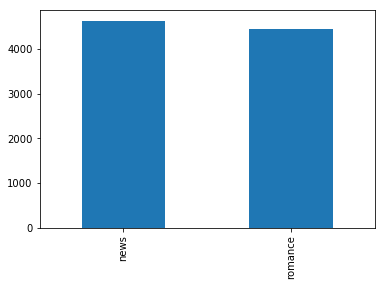

In [73]:
fig, ax = plt.subplots()
_ = df['label'].value_counts().plot.bar(ax=ax)


We have slightly more news data than romance data, which we should keep in mind as we go ahead with classification.

### What should we use as features for our data set?  What did we use as features for our fruit example before?
![fruit3](images/fruit3.png)

### Now that we are using sentences, how can we best repersent each sentence as a series of values?

One idea is to use how many particular *parts of speech* the sentence contains.

- Nouns: Most basically described as a person, place, or thing.  Counting nouns can help determine how many topics are being discussed in a sentence.
- Adjectives: Descriptors of nouns (eg. "yellow", "angry", "charming").  Counting adjectives can help determine how often descriptive words are being added to nouns, which can demonstrate writing style.
- Adverbs: Descriptors of verbs (eg. "quickly", "hungrily", "annoyingly").  Counting adverbs can help determine how often the manner of the verb is modified, which can also demonstrate writing style.

#### Why might we want to use these parts of speech to distinguish between news sentences and romance sentences?


We will now compute all of the parts of speech on each sentence (row) in our dataframe.

In [75]:
# compute parts of speech on each sentence (row)
pos_all = pos_tag_sents(df['sentence'])

In [74]:
print (pos_all[:5])

[[('The', 'DT'), ('Fulton', 'NNP'), ('County', 'NNP'), ('Grand', 'NNP'), ('Jury', 'NNP'), ('said', 'VBD'), ('Friday', 'NNP'), ('an', 'DT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NNP'), ('recent', 'JJ'), ('primary', 'JJ'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'DT'), ('evidence', 'NN'), ("''", "''"), ('that', 'IN'), ('any', 'DT'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')], [('The', 'DT'), ('jury', 'NN'), ('further', 'RB'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'JJ'), ('presentments', 'NNS'), ('that', 'IN'), ('the', 'DT'), ('City', 'NNP'), ('Executive', 'NNP'), ('Committee', 'NNP'), (',', ','), ('which', 'WDT'), ('had', 'VBD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'DT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VBZ'), ('the', 'DT'), ('praise', 'NN'), ('and', 'CC'), ('thanks', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('City', 'NNP'), ('of', 'IN'), ('Atlanta', 'NNP'), ("''", "

### What's with those part of speech labels?  They aren't helpful at all!
The Penn Tagset, which NLTK uses for it's part of speech tagger, is not particularly intuitive.  Fortunately, they provide code that allows you to check what different tags stand for.

In [76]:
nltk.help.upenn_tagset("NN")
nltk.help.upenn_tagset("JJ")
nltk.help.upenn_tagset("RB")

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...
RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...


### Write a function that calculates our features for us 
#### (In this case, numbers of nouns, adjectives, and adverbs that appear in the sentence)

Now we know the tags for the different parts of speech we want to count in each sentence.  Let's now write a function that will count the parts of speech to us, when given a part of speech tagged sentence (such as we have already in our DataFrame) and the part of speech we want to count (for example, "NN" to count the number of nouns in the sentence).

In [77]:
def countPOS(pos_tag_sent, POS):
    pos_count = 0
    all_pos_counts = []
    for sentence in pos_tag_sent:
        for word in sentence:
            tag = word[1]
            if tag [:2] == POS:  
                pos_count = pos_count+1
        all_pos_counts.append(pos_count)
        pos_count = 0
    return all_pos_counts

We will now call this function three different times, one for each of the parts of speech we are counting.  As we finish counting them, we put the results into the DataFrame, saving us the trouble of having to do so later.

In [78]:
df['NN'] = countPOS(pos_all, 'NN')
df['JJ'] = countPOS(pos_all, "JJ")
df['RB'] = countPOS(pos_all, "RB")

In [79]:
df.head()

,label,sentence,NN,JJ,RB
0,news,"[The, Fulton, County, Grand, Jury, said, Frida...",11,2,0
1,news,"[The, jury, further, said, in, term-end, prese...",13,2,1
2,news,"[The, September-October, term, jury, had, been...",16,2,0
3,news,"[``, Only, a, relative, handful, of, such, rep...",9,3,1
4,news,"[The, jury, said, it, did, find, that, many, o...",5,3,1


In [39]:
df.tail()

,label,sentence,NN,JJ,RB
4426,romance,"[Nobody, else, showed, pleasure, .]",2,0,1
4427,romance,"[Spike-haired, ,, burly, ,, red-faced, ,, deck...",9,3,1
4428,romance,"[``, Hello, ,, boss, '', ,, he, said, ,, and, ...",2,0,0
4429,romance,"[``, I, suppose, I, can, never, expect, to, ca...",3,0,1
4430,romance,"[``, I'm, afraid, not, '', .]",1,0,1


### So how many features do we have?

In [80]:
df.groupby('label').sum()

,NN,JJ,RB
label,,,
news,31593,6678,2935
romance,13821,4022,3570


### Let's visualize this data!
What do you notice about the data when we look visualize it?  Do you think our features will be good at predicting news and romance sentences?  Which features do you think will be the most useful?

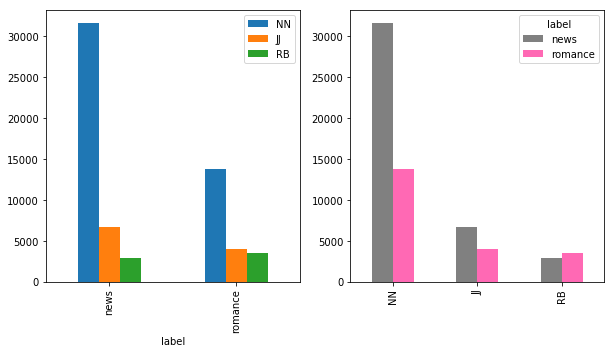

In [81]:
fig, (ax1,ax2) = plt.subplots(ncols=2,  figsize=(10,5))
_ = df.groupby('label').sum().plot.bar(ax=ax1)
_ = df.groupby('label').sum().T.plot.bar(ax=ax2, color=['gray','hotpink'])


### Save the dataframe to your computer as a csv file (comma separated value)


In [82]:
df.to_csv("C:/Users/Rachel/Documents/Grad_Stuff/DigitalFellows/NEHDRI_text_analysis/df_news_romance.csv")

### Begin new notebook here?  On supervised and unsupervised machine learning?

# How does supervised machine learning work?
Supervised machine learning takes places in two steps - the *training* phase, and the *testing* phase.  In the training phase, you use a portion of your data to *train* your algorithm (which, in our case, is a classification algorithm).  You provide both your feature vector and your labels to the algorithm, and the algorithm searches for patterns in your data that can help associate it with a particular label.

In the testing phase, we use the classifier we trained in the previous step, and give it previously unseen feature vectors representing unseen data to the algorithm, and have the algorithm predict the label.  We can then compare the "true" label to the predicted label, and see if our classifier provides us with a good and generlizable way of accomplishing the task (in our case, the task of automatically distinguishing news sentences from romance sentences).

![imagemlsteps](images/mlsteps.png)
Source: Andrew Rosenberg


It's important to remember that we cannot use the same data we used to build the classifier to test the data; if we did, our classifier would be 100% correct all of the time!  This will not tell us how our trained classifer will perform on new, unseen data.  We therefore need to split our data into a *train set* and a *test set*.
- We will use the train set data to train our classifier
- We will use the test set data to test our classifier

### Preparing data for machine learning
We're almost ready to do some machine learning!  First, we need to split our data into *feature vectors* and *labels*.  We need them separated to train the classifier.  Remember, the features we are using to train our classifier are numbers of nouns, adjectives, and adverbs are in each sentence.  (We are not using the sentences themselves as features!)

In [16]:
fv = df[["NN", "JJ", "RB"]]
fv.head()

,NN,JJ,RB
0,11,2,0
1,13,2,1
2,16,2,0
3,9,3,1
4,5,3,1


In [17]:
df['label'].value_counts()

news       4623
romance    4431
Name: label, dtype: int64

We have more news sentences than romance sentences; this is not a problem, but it's something to take note of during evaluation.


### Partitioning data into train and test sets
When you are partitioning your data into train and test sets, a good place to start is to use 75% of your data for training,and 25% of your data for testing.  We want as much training data as possible, while also having enough testing data to ensure that our trained classifier is generalizable across a number of examples.  This will also lead to more accurate evalutation of our trained classifier.

Fortunately, sklearn has a function that will do exactly this!

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fv, df['label'],
                                                stratify=df['label'], 
                                                test_size=0.25,
                                                   random_state = 42)

- We use the "stratify" argument because we have an uneven amount of training data; we have more news sentances than romance sentences.  By using stratify, we ensure that our classifier will take this data imbalence into account.


- In this example, we are using a fixed random state, to ensure we will always get exactly the same value when we classify.  Adding this argument is unnecessary for most types of classification; we do it here to ensure our results do not vary slightly across runs.

In [35]:
print(X_train.shape)
print(X_test.shape)

(6790, 3)
(2264, 3)


### What classifier do I use?
Chosing a classifier can be a challenging task.  However, this flowchart can give you an idea of where to start!

![algorithms_cheatsheet](images/algorithms_cheatsheet.png)
Source: Andreas Mueller


According to this, we are going to use LinearSVC, which is a linear model for classification that separates classes using a line, a plane, or a hyperplane. SVC stands for "Support Vector Classifier", which is a type of support vector machine algorithm.

![linearsvc](images/linearsvc.png)
Source: Andreas Mueller

### An animated example of classification 
The following animated GIF shows an example of linear classification.

![croppedml](images/croppedml.gif)

Source: Andrew Rosenberg

## Let's build a classification algorithm with sklearn!
One of the best things about sklearn is the simplicity of its syntax.


To do machine learning with sklearn, follow these three steps (the function names remain the same, regardless of the classifier you use!):

### Step 1:  Import your desired classifier

In [83]:
from sklearn.svm import LinearSVC

### Step 2: Create an instance of your machine learning algorithm

In [84]:
classifier = LinearSVC()

### Step 3:  Fit your data to your classifier (train), predict labels for unseen data (test), and score!

In [85]:
classifier.fit(X_train, y_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [86]:
y_predict = classifier.predict(X_test)

In [87]:
classifier.score(X_test, y_test)

0.70803886925795056

Right now, our classifier can predict previously unseen news and data 

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
confusion_matrix(y_test, y_predict)
confusion_matrix


|      |actual news | actual romance |
|:--: | :--:| :--:|
|predicted news | 759 | 397 |
|predicted romance|282 | 826|

## Add visualization of the decision boundaries (Hannah)

## Change paramaters example

Every classification algorithm has paramaters, which we can see above where we created an instance of a classifier.

~~~
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
~~~

In our linear SVC example, the paramater is C, with a default of 1.0.  It is important to know that the default paramater is not always the best paramater for the data, and that it is common to try several different values of C in order to optimize the algorithm for your data.  In the code below, we show an example of searching through several different values of C to find the best value for paramater C for our particular data.  We search across our training data only, to ensure that we are not generalizing too closely to our testing data (which would be an example of *overfitting* our data to the classification algorithm).

In [93]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

from sklearn.grid_search import GridSearchCV
grid_search = GridSearchCV(LinearSVC(), param_grid, cv=10)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1}
0.7082474226804124


With our new optimal C paramater (which in our case happens to be the default paramater, though that is not always the case), we can reclassify, setting C manually with the result of C that we get from grid searching through different paramaters of C. 

In [94]:
classifier = LinearSVC(C=1)
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

In [95]:
classifier.score(X_test, y_test)

0.70892226148409898

## Add visualization or animation of the paramater searching (Hannah)

## At the end, add some questions about ethics of machine learning (Hannah)